<a href="https://colab.research.google.com/github/2303A52096/Explainable-AI_LAB/blob/main/X_ai__assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv("/content/student_performance_dataset.csv")

In [25]:
df = df.drop("Student_ID", axis=1)


In [26]:
for col in df.select_dtypes(include="object").columns:
 df[col] = LabelEncoder().fit_transform(df[col])


In [27]:
X = df.drop("Final_Exam_Score", axis=1)
y = df["Final_Exam_Score"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

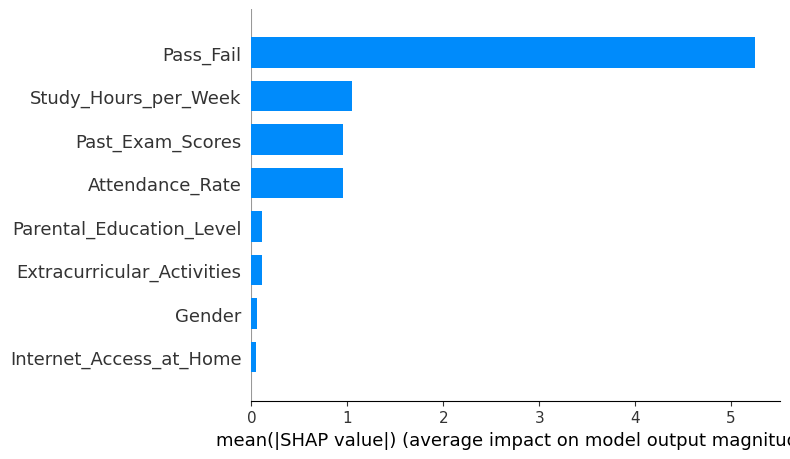

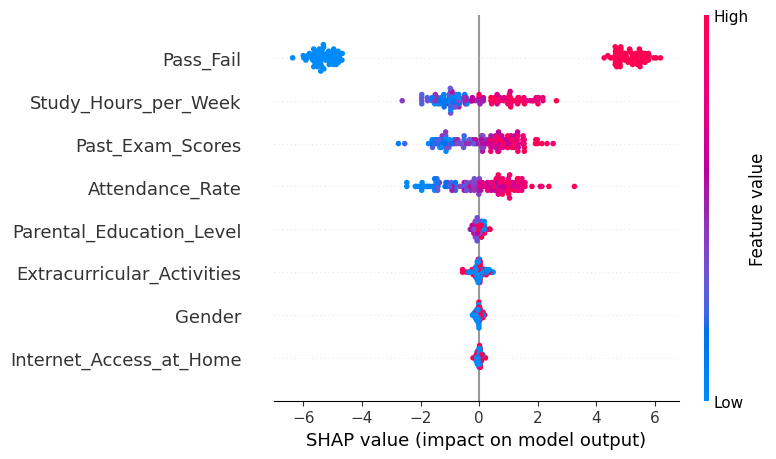

In [31]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             classification_report)

In [36]:
df = pd.read_csv("/content/student_performance_dataset.csv")


In [37]:
df = df.drop("Student_ID", axis=1)

In [38]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (708, 9)
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0    Male                    31        68.267841                86   
1    Male                    16        78.222927                73   
2  Female                    21        87.525096                74   
3  Female                    27        92.076483                99   
4  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_Fail  
0                63      Pass  
1   

In [39]:
print("\nMissing values before cleaning:\n", df.isnull().sum())
df = df.dropna()


Missing values before cleaning:
 Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


In [40]:
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


In [41]:
print("\nDuplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 208
Duplicates after: 0


In [42]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
 Q1 = df[col].quantile(0.25)
 Q3 = df[col].quantile(0.75)
 IQR = Q3 - Q1
 lower = Q1 - 1.5 * IQR
 upper = Q3 + 1.5 * IQR
 df = df[(df[col] >= lower) & (df[col] <= upper)]
print("\nShape after outlier removal:", df.shape)



Shape after outlier removal: (500, 9)


In [43]:
categorical_cols = df.select_dtypes(include="object").columns
encoder = LabelEncoder()
for col in categorical_cols:
 df[col] = encoder.fit_transform(df[col])
print("\nEncoded Columns:", categorical_cols.tolist())


Encoded Columns: ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']


In [44]:
X_classifier = df.drop("Pass_Fail", axis=1)
y_classifier = df["Pass_Fail"]

In [46]:
X_train_classifier, X_test_classifier, y_train_classifier, y_test_classifier = train_test_split(X_classifier, y_classifier, test_size=0.2, random_state=42)

In [47]:
model_classifier = RandomForestClassifier(n_estimators=100,
random_state=42)
model_classifier.fit(X_train_classifier, y_train_classifier)

RandomForestClassifier(random_state=42)

In [49]:
y_pred_classifier = model_classifier.predict(X_test_classifier)
y_prob_classifier = model_classifier.predict_proba(X_test_classifier)[:,1]

In [50]:
print("\n✅ Classification Metrics:")
print("Accuracy :", accuracy_score(y_test_classifier,
y_pred_classifier))
print("Precision:", precision_score(y_test_classifier,
y_pred_classifier))
print("Recall :", recall_score(y_test_classifier,
y_pred_classifier))
print("F1-Score :", f1_score(y_test_classifier, y_pred_classifier))
print("ROC-AUC :", roc_auc_score(y_test_classifier,
y_prob_classifier))
print("\nDetailed Report:\n", classification_report(y_test_classifier,
y_pred_classifier))


✅ Classification Metrics:
Accuracy : 1.0
Precision: 1.0
Recall : 1.0
F1-Score : 1.0
ROC-AUC : 1.0

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [51]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [52]:
print("\nFinal Dataset Shape (after scaling):", df.shape)
print(df.head())


Final Dataset Shape (after scaling): (500, 9)
   Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       1              0.661242        -0.541937          0.747277   
1       1             -1.044161         0.171423         -0.153725   
2       0             -0.475694         0.837996         -0.084417   
3       0              0.206467         1.164138          1.648278   
4       0              1.343403         1.635578         -0.846803   

   Parental_Education_Level  Internet_Access_at_Home  \
0                         1                        1   
1                         3                        0   
2                         3                        1   
3                         0                        0   
4                         2                        0   

   Extracurricular_Activities  Final_Exam_Score  Pass_Fail  
0                           1          1.057780          1  
1                           0         -1.018804          0  
2           

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score



In [55]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include="object").columns:
 df[col] = LabelEnco

In [56]:
X = df.drop("Final_Exam_Score", axis=1)
y = df["Final_Exam_Score"]


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
mpe = ((y_test - y_pred) / y_test).mean() * 100
print("✅ Regression Metrics:")
print("MSE :", mse)
print("RMSE :", rmse)
print("MAE :", mae)
print("MAPE :", mape)
print("MPE :", mpe)
print("R² :", r2)


✅ Regression Metrics:
MSE : 0.24113901221899384
RMSE : 0.49105907202595683
MAE : 0.37488733586251294
MAPE : 110.23293615354018
MPE : 25.508059104364992
R² : 0.7142755686971665


In [61]:
import shap
import matplotlib.pyplot as plt

In [62]:
explainer = shap.Explainer(model_classifier, X_train_classifier)


In [63]:
shap_values = explainer(X_test_classifier)

In [64]:
print("SHAP values object type:", type(shap_values))
print("Shape of SHAP values:", shap_values.shape)

SHAP values object type: <class 'shap._explanation.Explanation'>
Shape of SHAP values: (100, 8, 2)


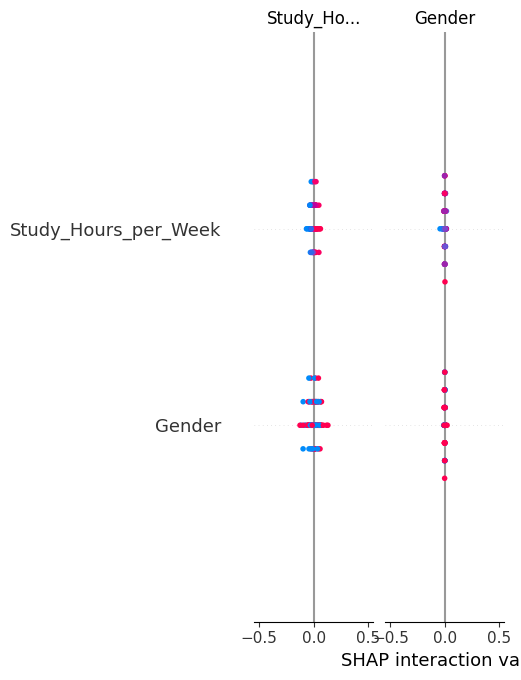

In [65]:
shap.summary_plot(shap_values, plot_type="bar")


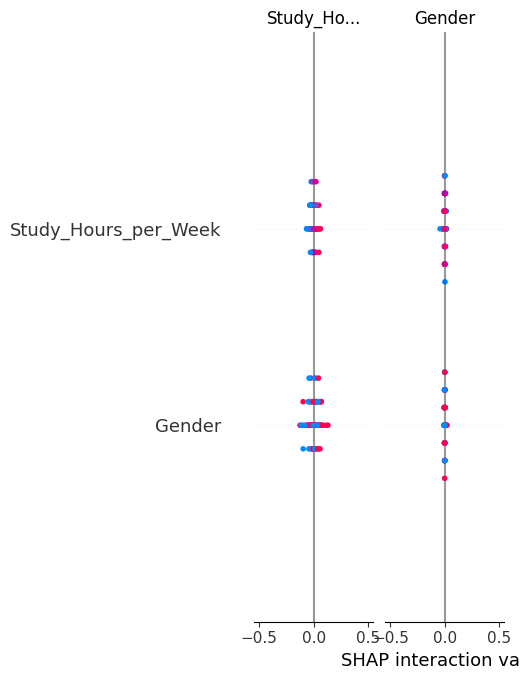

In [66]:
shap.summary_plot(shap_values)

In [67]:
instance_explanation = shap_values[0, :, 1]

In [73]:
shap.force_plot(instance_explanation)



In [74]:
import shap
import matplotlib.pyplot as plt

In [75]:
explainer = shap.Explainer(model_classifier, X_train_classifier)

In [76]:
shap_values = explainer(X_test_classifier)

In [77]:
print("SHAP values object type:", type(shap_values))
print("Shape of SHAP values:", shap_values.shape)

SHAP values object type: <class 'shap._explanation.Explanation'>
Shape of SHAP values: (100, 8, 2)


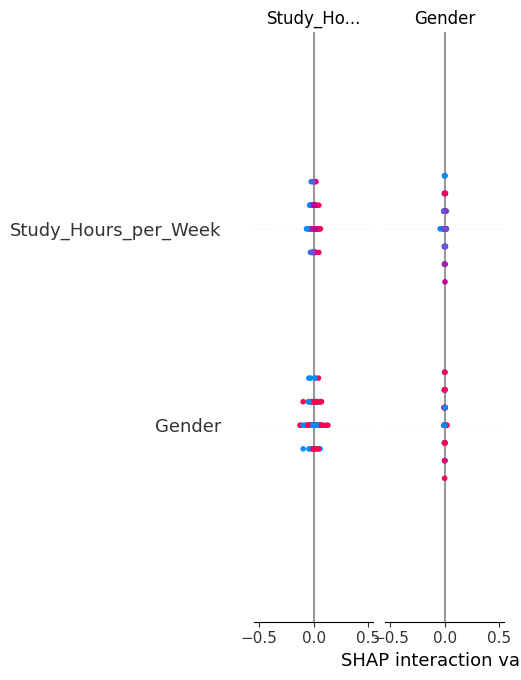

In [78]:
shap.summary_plot(shap_values, plot_type="bar")

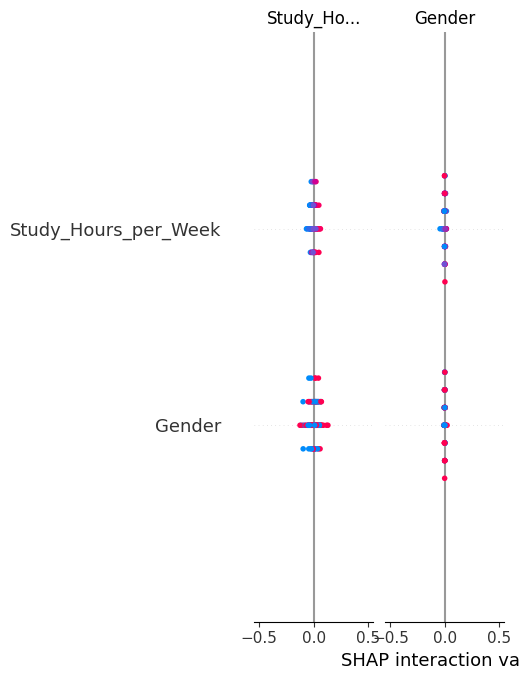

In [79]:
shap.summary_plot(shap_values)

In [80]:
shap.initjs()


In [81]:
instance_explanation = shap_values[0, :, 1]

In [82]:
shap.force_plot(instance_explanation)

In [83]:
instance_explanation_waterfall = shap_values[0, :, 1]

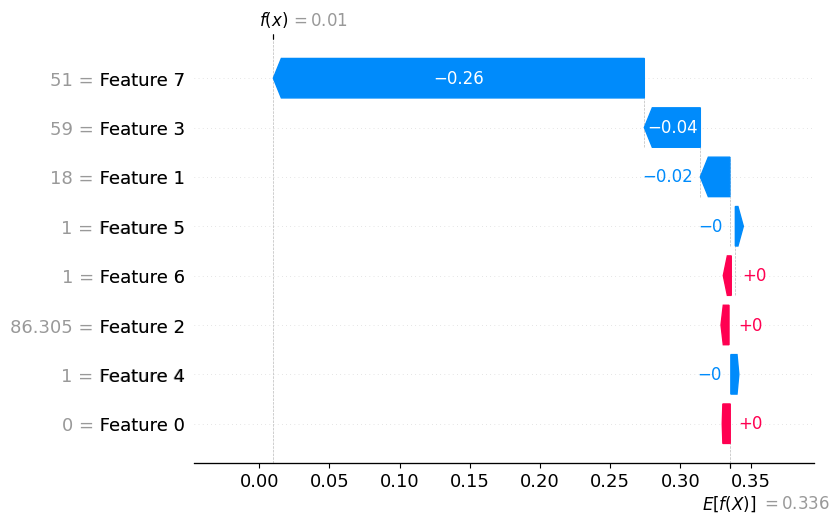

In [85]:
shap.waterfall_plot(shap.Explanation(values=instance_explanation_waterfall.values,
                                    base_values=instance_explanation_waterfall.base_values,
                                    data=instance_explanation_waterfall.data))

In [86]:
import shap
import matplotlib.pyplot as plt
import numpy as np

In [87]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

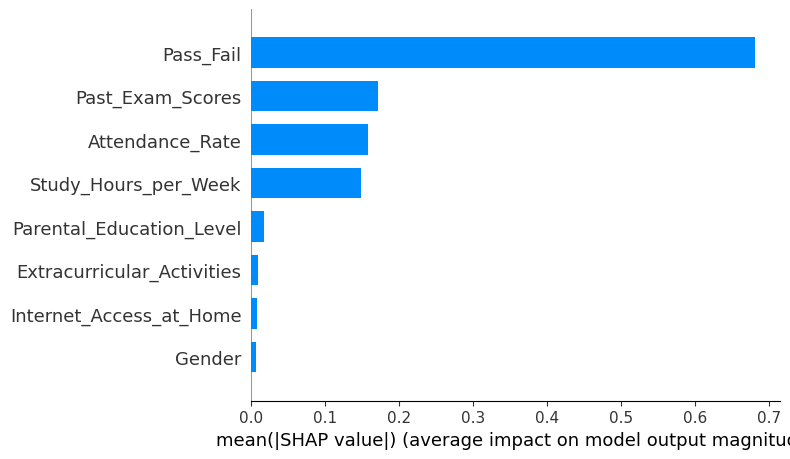

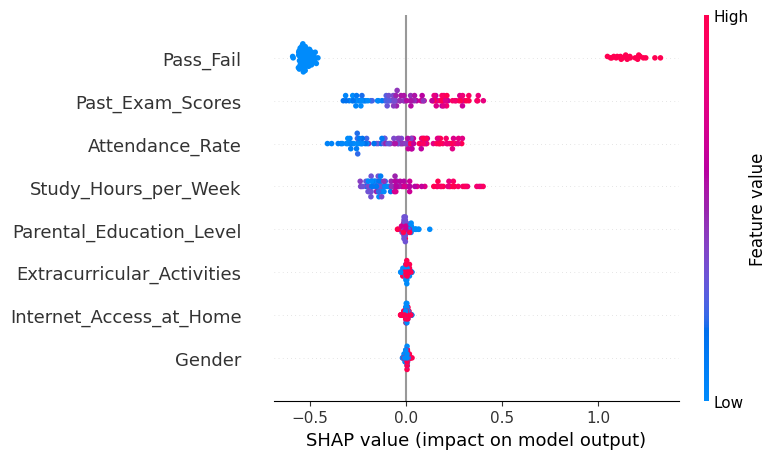

In [88]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [90]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [91]:
explanation_instance = shap.Explanation(values=shap_values[0,:],

base_values=explainer.expected_value,
 data=X_test.iloc[0,:],

feature_names=X_test.columns.tolist())

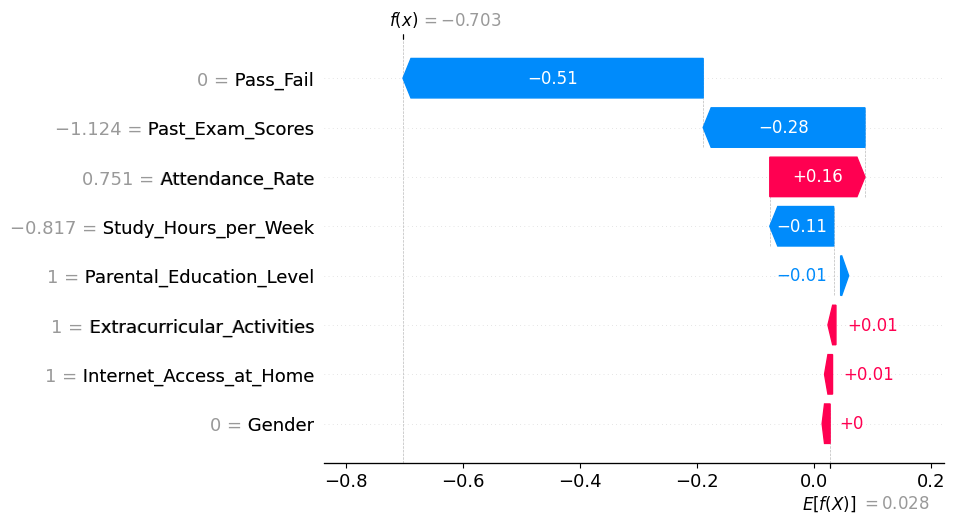

In [92]:
shap.waterfall_plot(explanation_instance)

In [93]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np


In [94]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [95]:
if isinstance(shap_values, list):
 shap_importance = np.abs(shap_values[1]).mean(axis=0)
else: # For regression
 shap_importance = np.abs(shap_values).mean(axis=0)
shap_feature_importance = pd.DataFrame({
 "Feature": X_test.columns,
 "SHAP Importance": shap_importance
}).sort_values(by="SHAP Importance", ascending=False)
print("\nTop 5 Features (SHAP):")
print(shap_feature_importance.head(5))


Top 5 Features (SHAP):
                    Feature  SHAP Importance
7                 Pass_Fail         0.681391
3          Past_Exam_Scores         0.171294
2           Attendance_Rate         0.157847
1      Study_Hours_per_Week         0.148831
4  Parental_Education_Level         0.017294


In [96]:
model_importance = pd.DataFrame({
 "Feature": X_test.columns,
 "Model Importance": model.feature_importances_
}).sort_values(by="Model Importance", ascending=False)
print("\nTop 5 Features (Model’s Built-in):")
print(model_importance.head(5))


Top 5 Features (Model’s Built-in):
                    Feature  Model Importance
7                 Pass_Fail          0.722574
2           Attendance_Rate          0.092876
3          Past_Exam_Scores          0.078602
1      Study_Hours_per_Week          0.068241
4  Parental_Education_Level          0.016164


In [97]:
comparison = shap_feature_importance.merge(model_importance,
on="Feature")
comparison = comparison.sort_values(by="SHAP Importance",
ascending=False)
print("\n🔹 Comparison of SHAP vs Model Feature Importance:\n")
print(comparison)


🔹 Comparison of SHAP vs Model Feature Importance:

                      Feature  SHAP Importance  Model Importance
0                   Pass_Fail         0.681391          0.722574
1            Past_Exam_Scores         0.171294          0.078602
2             Attendance_Rate         0.157847          0.092876
3        Study_Hours_per_Week         0.148831          0.068241
4    Parental_Education_Level         0.017294          0.016164
5  Extracurricular_Activities         0.008855          0.008554
6     Internet_Access_at_Home         0.008315          0.007051
7                      Gender         0.006152          0.005938


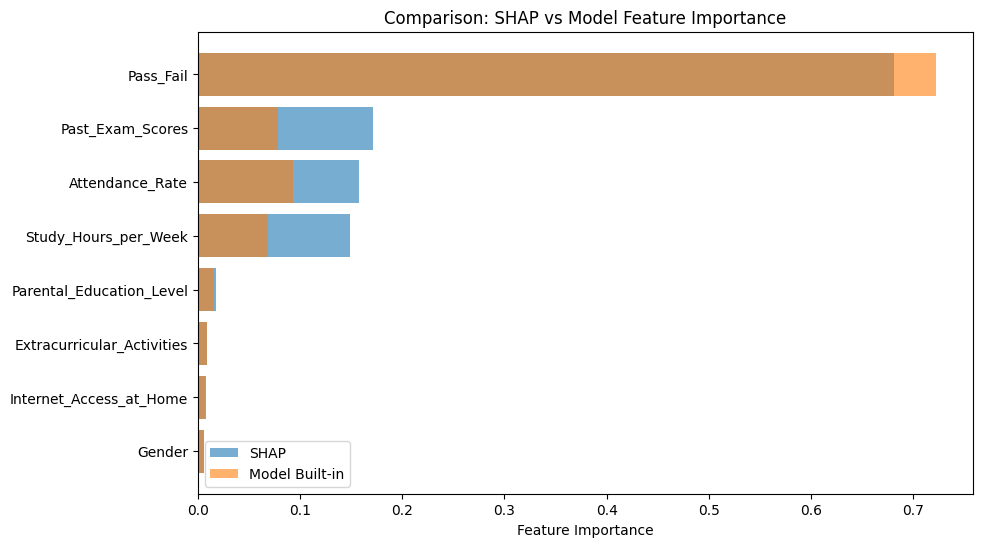

In [98]:
plt.figure(figsize=(10,6))
plt.barh(comparison["Feature"], comparison["SHAP Importance"],
alpha=0.6, label="SHAP")
plt.barh(comparison["Feature"], comparison["Model Importance"],
alpha=0.6, label="Model Built-in")
plt.xlabel("Feature Importance")
plt.title("Comparison: SHAP vs Model Feature Importance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()
